<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Overview" data-toc-modified-id="Overview-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Overview</a></span></li><li><span><a href="#Notebook-Configuration" data-toc-modified-id="Notebook-Configuration-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Notebook Configuration</a></span><ul class="toc-item"><li><span><a href="#Google-drive" data-toc-modified-id="Google-drive-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Google drive</a></span></li><li><span><a href="#Warning" data-toc-modified-id="Warning-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Warning</a></span></li><li><span><a href="#Matplotlib" data-toc-modified-id="Matplotlib-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Matplotlib</a></span></li><li><span><a href="#TensorFlow" data-toc-modified-id="TensorFlow-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>TensorFlow</a></span></li><li><span><a href="#Random-seed" data-toc-modified-id="Random-seed-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>Random seed</a></span></li></ul></li><li><span><a href="#Data-Preprocessing" data-toc-modified-id="Data-Preprocessing-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Data Preprocessing</a></span></li><li><span><a href="#Hyperparameter-Tuning" data-toc-modified-id="Hyperparameter-Tuning-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Hyperparameter Tuning</a></span></li><li><span><a href="#Model-Selection" data-toc-modified-id="Model-Selection-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Model Selection</a></span></li><li><span><a href="#Generating-the-Submission-File" data-toc-modified-id="Generating-the-Submission-File-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Generating the Submission File</a></span><ul class="toc-item"><li><span><a href="#Creating-the-directory-for-the-submission-file" data-toc-modified-id="Creating-the-directory-for-the-submission-file-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>Creating the directory for the submission file</a></span></li><li><span><a href="#Generating-the-submission-file" data-toc-modified-id="Generating-the-submission-file-6.2"><span class="toc-item-num">6.2&nbsp;&nbsp;</span>Generating the submission file</a></span></li></ul></li></ul></div>

<b>
<p>
<center>
<font size="5">
Popular Machine Learning Methods: Idea, Practice and Math
</font>
</center>
</p>
    
<p>
<center>
<font size="4">
Midterm
</font>
</center>
</p>

<p>
<center>
<font size="3">
Data Science, Columbian College of Arts & Sciences, George Washington University
</font>
</center>
</p>

<p>
<center>
<font size="3">
Yuxiao Huang
</font>
</center>
</p>
</b>

# Overview

- This notebook includes the midterm.
- Here we will work on kaggle competation [Poker Rule Induction dataset](https://www.kaggle.com/c/poker-rule-induction).
- The goal of this midterm is tweaking the pipeline (including data preprocessing, hyperparameter tuning and model selection) implemented in [/p2 c2 s4 shallow neural_networks/case_study](https://github.com/yuxiaohuang/teaching/blob/master/gwu/machine_learning_I/spring_2022/code/p2_shallow_learning/p2_c2_supervised_learning/p2_c2_s4_shallow_neural_networks/case_study/case_study.ipynb) to make it work for the new kaggle competation mentioned above.
- Complete the missing parts indicated by # Implement me.
- Particularly, the code should
    - be bug-free (note that the output produced by your solution may not necessarily be the same as the provided output, due to version issues)
    - be commented
- **The baseline for this assignment is 0.137729. As per the grading rubrics (section 15 of the syllabus), if the validation score of your best model is lower than or the same as the baseline, you will only receive 80% of the full mark. See more details in the grading rubrics.**
- Submit an ipynb file named midterm.ipynb to [blackboard](https://blackboard.gwu.edu) folder /Exams/midterm/.

# Notebook Configuration

## Google drive

In [1]:
# from google.colab import drive
import sys

# Mount Google Drive
# drive.mount('')

# Get the absolute path of the current folder
abspath_curr = ''

# Get the absolute path of the shallow utilities folder
abspath_util_shallow = ''

# Get the absolute path of the shallow models folder
abspath_model_shallow = ''

## Warning

In [2]:
import warnings

# Ignore warnings
warnings.filterwarnings('ignore')

## Matplotlib

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline 

# Set matplotlib sizes
plt.rc('font', size=20)
plt.rc('axes', titlesize=20)
plt.rc('axes', labelsize=20)
plt.rc('xtick', labelsize=20)
plt.rc('ytick', labelsize=20)
plt.rc('legend', fontsize=20)
plt.rc('figure', titlesize=20)

## TensorFlow

In [4]:
# The magic below allows us to use tensorflow version 2.x
import os
os.environ['CUDA_VISIBLE_DEVICES']='1'
os.environ['TF_FORCE_GPU_ALLOW_GROWTH']='true'
# %tensorflow_version 2.x 
import tensorflow as tf
from tensorflow import keras

## Random seed

In [5]:
# The random seed
random_seed = 42

# Set random seed in tensorflow
tf.random.set_seed(random_seed)

# Set random seed in numpy
import numpy as np
np.random.seed(random_seed)

# Data Preprocessing

In [6]:
# Change working directory to the absolute path of the shallow utilities folder
# %cd $abspath_util_shallow

# Import the shallow utitilities
%run pmlm_utilities_shallow.ipynb

## Load the data

In [7]:
import pandas as pd

df_raw_train = pd.read_csv(abspath_curr + 'poker-rule-induction/train.csv',
                           header=0)
df_raw_test = pd.read_csv(abspath_curr + 'poker-rule-induction/test.csv',
                           header=0)

df_train = df_raw_train.copy(deep=True)
df_test = df_raw_test.copy(deep=True)
target = 'hand'

In [8]:
def print_shape_for_tr_ts(train, test):
    print(pd.DataFrame({'Training':{'Instances':train.shape[0], 'Features':train.shape[1]},
                        'Testing':{'Instances':test.shape[0], 'Features':test.shape[1]}}).T)

In [9]:
def print_shape_for_tr_vl_ts(train, val, test):
    print(pd.DataFrame({'RawTraining':{'Instances':df_raw_train.shape[0], 'Features':df_raw_train.shape[1]},
                  'Training':{'Instances':train.shape[0], 'Features':train.shape[1]},
                  'Validation':{'Instances':val.shape[0], 'Features':val.shape[1]},
                  'Testing':{'Instances':test.shape[0], 'Features':test.shape[1]}}).T)

In [10]:
df_raw_train.hand.sort_values().unique()

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [11]:
print_shape_for_tr_ts(df_train, df_test)

          Instances  Features
Training      25010        11
Testing     1000000        11


## Glimpse of the data

In [12]:
df_train.head()

,S1,C1,S2,C2,S3,C3,S4,C4,S5,C5,hand
0,4,9,2,1,2,2,4,7,2,8,0
1,1,4,3,6,1,12,3,11,2,7,0
2,1,11,4,1,3,7,4,11,2,1,2
3,2,9,2,4,3,6,1,9,4,9,3
4,1,8,2,4,2,11,2,2,2,1,0


In [13]:
df_test.head()

,id,S1,C1,S2,C2,S3,C3,S4,C4,S5,C5
0,1,1,10,2,2,3,3,3,8,1,1
1,2,2,13,3,5,3,7,4,6,1,4
2,3,1,3,1,11,2,8,2,1,2,4
3,4,1,6,3,3,4,7,1,8,3,11
4,5,2,10,3,4,1,6,2,12,2,6


## Handling uncommon features

### Splitting the data

In [14]:
from sklearn.model_selection import train_test_split

# Divide the training data into training (80%) and validation (20%)
df_train, df_val = train_test_split(df_train, train_size=0.8, random_state=random_seed)

# Reset the index
df_train, df_val = df_train.reset_index(drop=True), df_val.reset_index(drop=True)

In [15]:
print_shape_for_tr_vl_ts(df_train, df_val, df_test)

             Instances  Features
RawTraining      25010        11
Training         20008        11
Validation        5002        11
Testing        1000000        11


### Identifying uncommon features

In [16]:
df_common_var = common_var_checker(df_train, df_val, df_test, target)

# Print df_common_var
df_common_var

,common var
0,C1
1,C2
2,C3
3,C4
4,C5
5,S1
6,S2
7,S3
8,S4
9,S5


In [17]:
uncommon_feature_train_not_val_test = np.setdiff1d(df_train.columns, df_common_var['common var'])
uncommon_feature_val_not_train_test = np.setdiff1d(df_val.columns, df_common_var['common var'])
uncommon_feature_test_not_train_val = np.setdiff1d(df_test.columns, df_common_var['common var'])

pd.DataFrame({'Train_not*':pd.Series(uncommon_feature_train_not_val_test),
              'Val_not*':pd.Series(uncommon_feature_val_not_train_test),
              'Test_not*':pd.Series(uncommon_feature_test_not_train_val)})

,Train_not*,Val_not*,Test_not*
0,NaN,NaN,id


#### Drop uncommon variables

In [18]:
df_train = df_train.drop(columns=uncommon_feature_train_not_val_test)
df_val = df_val.drop(columns=uncommon_feature_val_not_train_test)
df_test = df_test.drop(columns=uncommon_feature_test_not_train_val)

## Identifying identifiers

In [19]:
df = pd.concat([df_train, df_val, df_test], axis=0, sort=False)

In [20]:
df_id = id_checker(df)

# Remove identifiers from df_train
df_train.drop(columns=np.intersect1d(df_id.columns, df_train.columns), inplace=True)
df_val.drop(columns=np.intersect1d(df_id.columns, df_val.columns), inplace=True)
df_test.drop(columns=np.intersect1d(df_id.columns, df_test.columns), inplace=True)

In [21]:
df_id.columns

Index([], dtype='object')

In [22]:
df_train.columns

Index(['S1', 'C1', 'S2', 'C2', 'S3', 'C3', 'S4', 'C4', 'S5', 'C5', 'hand'], dtype='object')

In [23]:
df = pd.concat([df_train, df_val, df_test], axis=0, sort=False)

## Handling Missing Data

In [24]:
print(nan_checker(df_train))
print(nan_checker(df_val))
print(nan_checker(df_test))

Empty DataFrame
Columns: [var, proportion, dtype]
Index: []
Empty DataFrame
Columns: [var, proportion, dtype]
Index: []
Empty DataFrame
Columns: [var, proportion, dtype]
Index: []


## Handling Categorical Variables

In [25]:
df.dtypes

S1        int64
C1        int64
S2        int64
C2        int64
S3        int64
C3        int64
S4        int64
C4        int64
S5        int64
C5        int64
hand    float64
dtype: object

In [26]:
df_cat = cat_var_checker(df)
df_cat

,var,nunique


## Scaling the data

### Splitting the data

In [27]:
df_train = df.iloc[:df_train.shape[0], :]
df_val = df.iloc[df_train.shape[0]:df_train.shape[0] + df_val.shape[0], :]
df_test = df.iloc[df_train.shape[0] + df_val.shape[0]:, :]

In [28]:
df_val.hand.unique()

array([0., 1., 3., 2., 4., 6., 5., 9.])

### Separate features, and target. Numpy version

In [29]:
# Get the feature matrix
X_train = df_train[np.setdiff1d(df_train.columns, [target])].values
X_val = df_val[np.setdiff1d(df_val.columns, [target])].values
X_test = df_test[np.setdiff1d(df_test.columns, [target])].values

# Get the target vector
y_train = df_train[target].values
y_val = df_val[target].values

## Scaling the data

In [30]:
np.unique(y_val)

array([0., 1., 2., 3., 4., 5., 6., 9.])

In [31]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
X_train_s = ss.fit_transform(X_train)
X_val_s = ss.transform(X_val)
X_test_s = ss.transform(X_test)
# X_tr_synth = ss.transform(X_tr_synth)

y_train = y_train.astype(int)
y_val = y_val.astype(int)

## Balance of the data

### Visualizing the balance

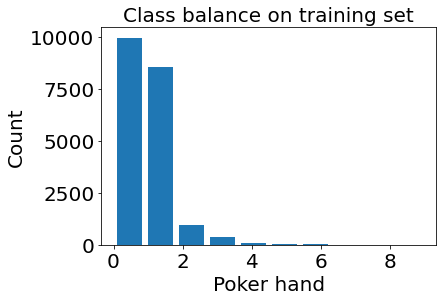

In [32]:
plt.figure()
plt.hist(df_train[target], rwidth=0.8, bins=10)
plt.xlabel('Poker hand')
plt.ylabel('Count')
plt.title('Class balance on training set')
plt.show()

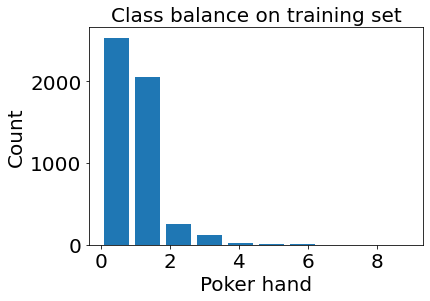

In [33]:
plt.figure()
plt.hist(df_val[target], rwidth=0.8)
plt.xlabel('Poker hand')
plt.ylabel('Count')
plt.title('Class balance on training set')
plt.show()

In [34]:
print_shape_for_tr_vl_ts(df_train, df_val, df_test)

             Instances  Features
RawTraining      25010        11
Training         20008        11
Validation        5002        11
Testing        1000000        11


In [36]:
poker_hand_key_value = {}
for value in df_train.hand.unique():
    count = np.sum(y_train == value)
    poker_hand_key_value[int(value)] = count

pd.Series(poker_hand_key_value)

0    9959
1    8540
2     957
3     394
5      46
4      70
8       5
7       6
6      27
9       4
dtype: int64

In [37]:
over_sampling_strategy = {}
over_sampling_strategy[3] = 500
over_sampling_strategy[4] = 100
over_sampling_strategy[5] = 100
over_sampling_strategy[6] = 100

In [38]:
over_sampling_strategy

{3: 500, 4: 100, 5: 100, 6: 100}

In [39]:
# from sklearn.model_selection import GridSearchCV
# from sklearn.neighbors import KNeighborsClassifier

# knn = KNeighborsClassifier()

# k_range = [10, 20, 30, 40, 50, 100]
# param_grid = {'n_neighbors':k_range}
# grid_cv = GridSearchCV(knn, param_grid, cv=10, 
#                        scoring='f1_macro', n_jobs=-1,
#                        return_train_score=True)
# grid_cv = grid_cv.fit(X_train_s, y_train)

In [40]:
# print(f'Best score: {grid_cv.best_score_} Best K: {grid_cv.best_params_}')

In [41]:
try:
    import imblearn
except:
    !pip install imblearn
    import imblearn

In [42]:
# X_train_s.shape

In [43]:
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as imbpipeline

sm = SMOTE(random_state=random_seed, 
           k_neighbors=20,
           sampling_strategy=over_sampling_strategy,
           n_jobs=-1)

# smtk = SMOTETomek(random_state=random_seed,
#                   # sampling_strategy=sampling_strategy,
#                   #smote=sm,
#                   n_jobs=-1)

# X_train_s, y_train = sm.fit_resample(X_train_s, y_train)

# Modeling

# Hyperparameter Tuning

In [44]:
y_train = y_train.astype(int)
y_val = y_val.astype(int)

In [45]:
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingClassifier, \
                             GradientBoostingClassifier,\
                             AdaBoostClassifier

models = {'lr': LogisticRegression(class_weight='balanced', random_state=random_seed),
          'mlpc': MLPClassifier(early_stopping=True, random_state=random_seed,
                                max_iter=1000),
          'rfc': RandomForestClassifier(class_weight='balanced', 
                                        random_state=random_seed, bootstrap=True,
                                        n_jobs=-1),
          'hgbc': HistGradientBoostingClassifier(random_state=random_seed),
          'gbc': GradientBoostingClassifier(random_state=random_seed),
          'abc': AdaBoostClassifier(random_state=random_seed)}

In [46]:
from sklearn.pipeline import Pipeline

pipes = {}

for acronym, model in models.items():
    pipes[acronym] = imbpipeline(steps=[['sampling', sm],
                                        ['model', model]])

In [47]:
# Get the:
# feature matrix and target velctor in the combined training and validation data
# target vector in the combined training and validation data
# PredefinedSplit
# See the implementation in pmlm_utilities.ipynb
# X_train_val, y_train_val, ps = get_train_val_ps(X_train_s, y_train, 
#                                                 X_val_s, y_val)

In [48]:
param_grids = {}

# Logistic Regression

tol_grid = [10 ** -5, 10 ** -4, 10 ** -3]
C_grid = np.linspace(5e-1, 0.9, 10)
param_grids['lr'] = [{'model__tol': tol_grid,
                      'model__C': C_grid}]

# MLP Classifier
alpha_grids = [10 ** i for i in range(-5, -2)]
learning_rate_grids = np.linspace(1e-4, 1e-1, 10)
hidden_layer_sizes = [16, 16, 32, 32, 64, 64]
param_grids['mlpc'] = [{'model__alpha': alpha_grids,
                        'model__learning_rate_init': learning_rate_grids,
                        'model__hidden_layer_sizes': hidden_layer_sizes
                       }]

# Random Forest
min_samples_split_grids = [2, 10, 30, 50, 80, 100]
min_samples_leaf_grids = [1, 20, 40, 80, 100]
max_leaf_nodes_grids = [10, 15, 30, 40, 50]
max_samples_grid = [0.7, 0.8, 0.9, 1.0]
param_grids['rfc'] = [{'model__min_samples_split': min_samples_split_grids,
                       'model__min_samples_leaf': min_samples_leaf_grids,
                       'model__max_leaf_nodes': max_leaf_nodes_grids,
                       'model__max_samples': max_samples_grid}]

param_grids['hgbc'] = [{'model__learning_rate': learning_rate_grids,
                        'model__min_samples_leaf': min_samples_leaf_grids}]

min_impurity_dec_grid = [0, 0.1, 0.2, 0.3, 0.4, 0.5]
n_estimators_grid = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
param_grids['gbc'] = [{'model__learning_rate': learning_rate_grids,
                       'model__min_impurity_decrease': min_impurity_dec_grid,
                       'model__n_estimators': n_estimators_grid}]


param_grids['abc'] = [{'model__learning_rate': learning_rate_grids,
                       'model__n_estimators': n_estimators_grid}]

In [49]:
# Make directory
directory = os.path.dirname(abspath_curr + 'result/midterm/cv_results/GridSearchCV/')
if not os.path.exists(directory):
    os.makedirs(directory)

In [50]:
from sklearn.model_selection import GridSearchCV

# The list of [best_score_, best_params_, best_estimator_] obtained by GridSearchCV
best_score_params_estimator_gs = []

# For each model
for acronym in pipes.keys():
    # GridSearchCV
    gs = GridSearchCV(estimator=pipes[acronym],
                      param_grid=param_grids[acronym],
                      scoring='f1_macro',
                      n_jobs=-1,
                      cv=5,
                      return_train_score=True)
        
    # Fit the pipeline
    gs = gs.fit(X_train_s, y_train)
    
    # Update best_score_params_estimator_gs
    best_score_params_estimator_gs.append([gs.best_score_, gs.best_params_, gs.best_estimator_])
    
    # Sort cv_results in ascending order of 'rank_test_score' and 'std_test_score'
    cv_results = pd.DataFrame.from_dict(gs.cv_results_).sort_values(by=['rank_test_score', 'std_test_score'])
    
    # Get the important columns in cv_results
    important_columns = ['rank_test_score',
                         'mean_test_score', 
                         'std_test_score', 
                         'mean_train_score', 
                         'std_train_score',
                         'mean_fit_time', 
                         'std_fit_time',                        
                         'mean_score_time', 
                         'std_score_time']
    
    # Move the important columns ahead
    cv_results = cv_results[important_columns + sorted(list(set(cv_results.columns) - set(important_columns)))]

    # Write cv_results file
    cv_results.to_csv(path_or_buf=abspath_curr + 'result/midterm/cv_results/GridSearchCV/' + acronym + '.csv', index=False)

# Sort best_score_params_estimator_gs in descending order of the best_score_
best_score_params_estimator_gs = sorted(best_score_params_estimator_gs, key=lambda x : x[0], reverse=True)

# Print best_score_params_estimator_gs
pd.DataFrame(best_score_params_estimator_gs, columns=['best_score', 'best_param', 'best_estimator'])

,best_score,best_param,best_estimator
0,0.241010,"{'model__alpha': 0.0001, 'model__hidden_layer_...","(SMOTE(k_neighbors=20, n_jobs=-1, random_state..."
1,0.221409,"{'model__learning_rate': 0.06670000000000001, ...","(SMOTE(k_neighbors=20, n_jobs=-1, random_state..."
2,0.157471,"{'model__learning_rate': 0.1, 'model__min_impu...","(SMOTE(k_neighbors=20, n_jobs=-1, random_state..."
3,0.102199,"{'model__max_leaf_nodes': 50, 'model__max_samp...","(SMOTE(k_neighbors=20, n_jobs=-1, random_state..."
4,0.071507,"{'model__learning_rate': 0.0889, 'model__n_est...","(SMOTE(k_neighbors=20, n_jobs=-1, random_state..."
5,0.023420,"{'model__C': 0.8111111111111111, 'model__tol':...","(SMOTE(k_neighbors=20, n_jobs=-1, random_state..."


In [51]:
best_score_params_estimator_gs

[[0.2410097953065947,
  {'model__alpha': 0.0001,
   'model__hidden_layer_sizes': 64,
   'model__learning_rate_init': 0.0112},
  Pipeline(steps=[('sampling',
                   SMOTE(k_neighbors=20, n_jobs=-1, random_state=42,
                         sampling_strategy={3: 500, 4: 100, 5: 100, 6: 100})),
                  ['model',
                   MLPClassifier(early_stopping=True, hidden_layer_sizes=64,
                                 learning_rate_init=0.0112, max_iter=1000,
                                 random_state=42)]])],
 [0.2214092371879497,
  {'model__learning_rate': 0.06670000000000001, 'model__min_samples_leaf': 40},
  Pipeline(steps=[('sampling',
                   SMOTE(k_neighbors=20, n_jobs=-1, random_state=42,
                         sampling_strategy={3: 500, 4: 100, 5: 100, 6: 100})),
                  ['model',
                   HistGradientBoostingClassifier(learning_rate=0.06670000000000001,
                                                  min_samples_leaf

In [53]:
models.keys()

dict_keys(['lr', 'mlpc', 'rfc', 'hgbc', 'gbc', 'abc'])

In [98]:
X_train_s.shape

(20271, 10)

In [99]:
X_val_s.shape

(5002, 10)

In [54]:
for i, key in enumerate(models.keys()):
    tmp_model = pd.DataFrame(best_score_params_estimator_gs, 
                             columns=['best_score', 'best_param', 'best_estimator']
                            )['best_estimator'].iloc[i]
    print(f'{key} f1_macro: {tmp_model.score(X_val_s, y_val)}')

lr f1_macro: 0.6235505797680928
mlpc f1_macro: 0.6185525789684126
rfc f1_macro: 0.6027588964414234
hgbc f1_macro: 0.34146341463414637
gbc f1_macro: 0.5065973610555777
abc f1_macro: 0.023190723710515795


/home/rajkumarcm/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/rajkumarcm/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-re

# Model Selection

In [55]:
from sklearn.metrics import f1_score

In [56]:
for i, key in enumerate(models.keys()):
    tmp_model = pd.DataFrame(best_score_params_estimator_gs, 
                             columns=['best_score', 'best_param', 'best_estimator']
                            )['best_estimator'].iloc[i]
    tmp_pred = tmp_model.predict(X_val_s)
    print(f'{key} f1_macro: {f1_score(y_true=y_val, y_pred=tmp_pred, average="macro")}')

lr f1_macro: 0.4412541068432541
mlpc f1_macro: 0.19695248221680284
rfc f1_macro: 0.1765520732014969
hgbc f1_macro: 0.09990240796071491
gbc f1_macro: 0.08406316348195329
abc f1_macro: 0.019022212423017607


In [57]:
# Get the best_score, best_params and best_estimator obtained by GridSearchCV
best_score_gs, best_params_gs, best_estimator_gs = best_score_params_estimator_gs[0]

In [58]:
best_estimator_gs

Pipeline(steps=[('sampling',
                 SMOTE(k_neighbors=20, n_jobs=-1, random_state=42,
                       sampling_strategy={3: 500, 4: 100, 5: 100, 6: 100})),
                ['model',
                 MLPClassifier(early_stopping=True, hidden_layer_sizes=64,
                               learning_rate_init=0.0112, max_iter=1000,
                               random_state=42)]])

# Generating the Submission File
Use the best model selected earlier to generate the submission file for this kaggle competition.

## Creating the directory for the submission file

In [102]:
# Make directory
directory = os.path.dirname(abspath_curr + 'result/submission/')
if not os.path.exists(directory):
    os.makedirs(directory)

## Generating the submission file

In [ ]:
# Get the prediction on the testing data using best_model
y_test_pred = best_estimator_gs.predict(X_test)

# Transform y_test_pred back to the original class
y_test_pred = le.inverse_transform(y_test_pred)

# Get the submission dataframe
df_submit = pd.DataFrame(np.hstack((np.arange(1, y_test_pred.shape[0] + 1).reshape(-1, 1), y_test_pred.reshape(-1, 1))),
                         columns=['id', target]).astype({'id':int, target:int})                                                                                      

# Generate the submission file
df_submit.to_csv(abspath_curr + '/result/submission/submission.csv', index=False)                                                                              